# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 26.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
351531,1.3721,0.0977,0.4297,0.3198,0.0049,0.0293,0.3198,0.7422,0.1587,0.4077,7,7,12,12
178357,0.5127,0.2954,0.1880,1.3867,0.0928,0.0244,0.3491,1.1377,0.4102,0.6104,1,1,10,10
57237,0.4126,0.0024,0.0049,0.0781,0.0024,0.0024,0.1538,0.9839,0.0024,0.1318,8,8,7,7
291844,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0366,0,0,0,0
284466,0.1660,0.0024,0.0049,0.0024,0.0049,0.0049,0.0049,0.0073,0.0049,0.0757,0,0,0,0


In [3]:
raw_data.shape

(463778, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463778 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          463778 non-null  float64
 1   Emg2          463778 non-null  float64
 2   Emg3          463778 non-null  float64
 3   Emg4          463778 non-null  float64
 4   Emg5          463778 non-null  float64
 5   Emg6          463778 non-null  float64
 6   Emg7          463778 non-null  float64
 7   Emg8          463778 non-null  float64
 8   Emg9          463778 non-null  float64
 9   Emg10         463778 non-null  float64
 10  repetition    463778 non-null  int64  
 11  rerepetition  463778 non-null  int64  
 12  stimulus      463778 non-null  int64  
 13  restimulus    463778 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.5 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,463778.000000,463778.00000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000
mean,0.370431,0.09488,0.171677,0.133734,0.017742,0.039629,0.337346,0.418753,0.091687,0.227919,3.200486,2.111698,5.672708,3.792519
std,0.579287,0.25710,0.487344,0.359362,0.062053,0.131240,0.602700,0.643606,0.290849,0.426220,3.487157,3.228558,6.589330,6.134340
min,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.029300,0.00240,0.004900,0.002400,0.002400,0.002400,0.036600,0.009800,0.002400,0.014600,0.000000,0.000000,0.000000,0.000000
50%,0.151400,0.00490,0.004900,0.004900,0.004900,0.004900,0.131800,0.117200,0.004900,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.388200,0.04880,0.063500,0.092800,0.004900,0.024400,0.349100,0.600600,0.048800,0.224600,6.000000,4.000000,10.000000,7.000000
max,4.646000,4.64360,4.641100,4.643600,1.984900,4.643600,4.643600,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193905
4      15609
12     15605
7      15602
8      15602
2      15599
11     15574
5      15570
6      15561
9      15554
10     15531
3      15530
1      15524
14     10407
17     10406
13     10402
15     10367
16     10334
18      5203
21      5202
19      5200
23      5166
20      5163
22      5162
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

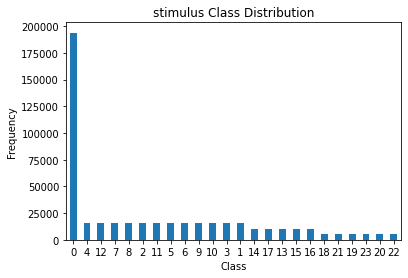

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
48150,0.1343,0.0024,0.0049,0.0049,0.0024,0.0024,0.1147,0.1318,0.0049,0.0195,0,0,0,0
25400,0.1636,0.0049,0.0049,0.0024,0.0024,0.0049,0.1392,0.3101,0.0024,0.0879,0,0,0,0
214553,0.3760,0.1953,0.7031,0.4443,0.0293,0.0195,0.7593,1.1011,0.1929,0.3833,4,4,14,14
437515,0.0708,0.0024,0.0049,0.0024,0.0024,0.0122,0.0854,0.0146,0.0049,0.0635,0,0,0,0
201573,0.0586,0.0049,0.0049,0.0049,0.0049,0.0024,0.0049,0.0098,0.0049,0.0024,0,0,0,0


In [12]:
raw_data.shape

(364904, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364904 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          364904 non-null  float64
 1   Emg2          364904 non-null  float64
 2   Emg3          364904 non-null  float64
 3   Emg4          364904 non-null  float64
 4   Emg5          364904 non-null  float64
 5   Emg6          364904 non-null  float64
 6   Emg7          364904 non-null  float64
 7   Emg8          364904 non-null  float64
 8   Emg9          364904 non-null  float64
 9   Emg10         364904 non-null  float64
 10  repetition    364904 non-null  int64  
 11  rerepetition  364904 non-null  int64  
 12  stimulus      364904 non-null  int64  
 13  restimulus    364904 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 41.8 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 88.55592551486004


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     38104
           1       0.84      0.85      0.85      2099
           2       0.88      0.87      0.88      1914
           3       0.85      0.84      0.85      2255
           4       0.88      0.86      0.87      1818
           5       0.86      0.87      0.86      1809
           6       0.85      0.83      0.84      1892
           7       0.82      0.81      0.81      1918
           8       0.79      0.81      0.80      1790
           9       0.71      0.73      0.72      2140
          10       0.66      0.67      0.66      2007
          11       0.80      0.79      0.80      1897
          12       0.77      0.79      0.78      1891
          13       0.83      0.81      0.82      1233
          14       0.76      0.80      0.78      1292
          15       0.83      0.84      0.84      1372
          16       0.83      0.83      0.83      1510
 

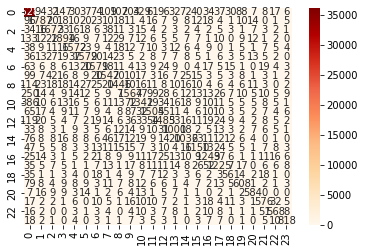

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.8403146024307696
MSE: 9.186870555350023
RMSE: 3.0309850800276177


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8861202120797435
Recall Score :  0.8855592551486003
f1_score :  0.8857988543824542


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 94.3053671503542


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     38104
           1       0.93      0.94      0.94      2099
           2       0.96      0.94      0.95      1914
           3       0.93      0.91      0.92      2255
           4       0.96      0.96      0.96      1818
           5       0.93      0.94      0.94      1809
           6       0.95      0.94      0.94      1892
           7       0.93      0.92      0.93      1918
           8       0.91      0.89      0.90      1790
           9       0.84      0.83      0.84      2140
          10       0.79      0.75      0.77      2007
          11       0.93      0.91      0.92      1897
          12       0.91      0.91      0.91      1891
          13       0.96      0.96      0.96      1233
          14       0.91      0.91      0.91      1292
          15       0.92      0.94      0.93      1372
          16       0.97      0.95      0.96      1510
 

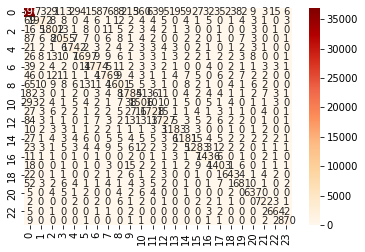

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.462079171291158
MSE: 5.213535029665255
RMSE: 2.2833166731019277


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9427123474962861
Recall Score :  0.943053671503542
f1_score :  0.9428308669501516


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 95.01788136638302


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     38104
           1       0.95      0.92      0.94      2099
           2       0.97      0.94      0.96      1914
           3       0.97      0.90      0.93      2255
           4       0.97      0.95      0.96      1818
           5       0.95      0.95      0.95      1809
           6       0.97      0.93      0.95      1892
           7       0.96      0.90      0.93      1918
           8       0.94      0.87      0.91      1790
           9       0.91      0.81      0.86      2140
          10       0.94      0.73      0.82      2007
          11       0.95      0.90      0.92      1897
          12       0.95      0.89      0.92      1891
          13       0.97      0.95      0.96      1233
          14       0.93      0.90      0.92      1292
          15       0.94      0.93      0.94      1372
          16       0.97      0.95      0.96      1510
 

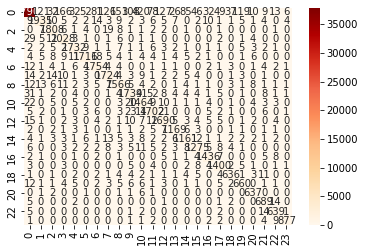

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.39667858757758867
MSE: 4.492539154026391
RMSE: 2.1195610757952674


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9501670810621646
Recall Score :  0.9501788136638303
f1_score :  0.9491825205954213


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[17:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 94.29988627176937


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     38104
           1       0.94      0.93      0.93      2099
           2       0.95      0.93      0.94      1914
           3       0.95      0.90      0.92      2255
           4       0.95      0.94      0.95      1818
           5       0.93      0.94      0.94      1809
           6       0.95      0.92      0.93      1892
           7       0.93      0.90      0.91      1918
           8       0.92      0.88      0.90      1790
           9       0.88      0.81      0.84      2140
          10       0.87      0.74      0.80      2007
          11       0.93      0.89      0.91      1897
          12       0.91      0.89      0.90      1891
          13       0.93      0.94      0.94      1233
          14       0.89      0.89      0.89      1292
          15       0.94      0.91      0.93      1372
          16       0.96      0.94      0.95      1510
 

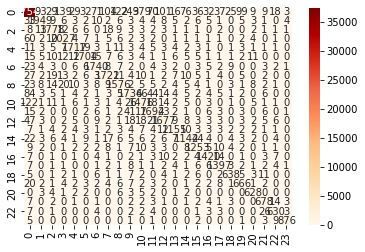

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.43366081582877736
MSE: 4.800221975582686
RMSE: 2.1909408881991057


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9422455542758136
Recall Score :  0.9429988627176936
f1_score :  0.9422127439163123


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 95.02199202532165


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     38104
           1       0.96      0.91      0.93      2099
           2       0.98      0.95      0.96      1914
           3       0.98      0.90      0.93      2255
           4       0.98      0.95      0.96      1818
           5       0.95      0.95      0.95      1809
           6       0.98      0.92      0.95      1892
           7       0.97      0.90      0.93      1918
           8       0.96      0.87      0.91      1790
           9       0.93      0.81      0.86      2140
          10       0.94      0.73      0.83      2007
          11       0.95      0.90      0.93      1897
          12       0.97      0.89      0.93      1891
          13       0.98      0.96      0.97      1233
          14       0.95      0.88      0.92      1292
          15       0.96      0.93      0.94      1372
          16       0.99      0.95      0.97      1510
 

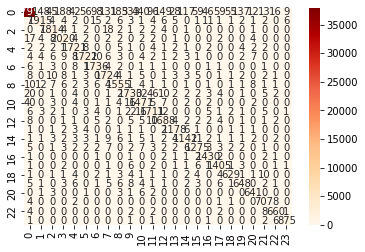

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.4206848357791754
MSE: 4.916402899384772
RMSE: 2.2172963039216866


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9507686230020062
Recall Score :  0.9502199202532166
f1_score :  0.9492149535453906
